<font color='blue'>Привет! Итак, первый модуль почти завершен, проделана огромная работа, приобретено множество новых знаний, проведено не одно интересное исслелование, так держать! Я проверю твой сборный проект и напишу свои комментарии. Они, в зависимости от результата проверки, будут в </font><font color='green'>зеленом (когда все отлично),</font> <font color='brown'>коричневом (когда можно лучше)</font><font color='blue'> или</font> <font color='red'>красном (когда нужно переделать, чтобы я принял работу).</font><font color='blue'> Ну и в синем будут просто советы и нейтральные комментарии. Постарайся учесть все это в дальнейших проектах.</font>

# Исследование: Выявление закономерностей успеха игр

### Описание Проекта
Стримчик, интернет-магазин, продающий компьютерные игры по всему миру. Из открытых источников доступны исторические данные о продажах игр, пользовательских и экспертных рейтингах, жанрах и платформах (например, Xbox или PlayStation). Вам нужно определить закономерности, которые определяют успех игры. Это позволит вам делать ставки на потенциально популярный продукт и планировать рекламные кампании.

### Описание последовательности действий

#### Шаг 1. Изучение общей информации

#### Шаг 2. Предварительная обработка данных
- Изменения имени столбца
- Обработка пробелов в данных
- Изменения типа данных
- Расчет общих продаж во всех регионах

#### Шаг 3. Анализ данных
- Количество игр, выпущенных в разные годы
- Продажа игр на разных платформах
- Определение потенциально прибыльных платформ
- Графики продаж игр на разных платформах
- Влияние обзоров продаж на платформе
- Влияние игровых жанров на продажи

#### Шаг 4. Пользовательский портрет каждого региона
- Самые популярные платформы (Топ 5)
- Самые популярные жанры (Топ 5)
- Влияет ли рейтинг ESRB на продажи в конкретном регионе?

#### Шаг 5. Проверка гипотез
- Гипотеза 1. Средний рейтинг пользователей платформ Xbox One и ПК одинаков
- Гипотеза 2: средние пользовательские рейтинги для жанров экшн и спорт разные)

#### Шаг 6. Общий вывод

# Шаг 1. Изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


В таблице 11 столбцов.

Необходимо изменить типы данных в столбцах:

- Year_of_Release - заменить на int64;
- Critic_Score - заменить на int64;
- User_Score - заменить на float64;

В остальном, я думаю, что данные верны.

In [5]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
data.duplicated().sum()

0

В данных нет дубликатов, но есть пробелы:
- Пробелы в столбце Name. По названиям игры можно предположить что они из рейтинга игрового контента и продаж по регионам. Но такую ошибку может сделать только человек, который хорошо знает игровую индустрию и все игры, поэтому не могу ни чего сделать с этими 2 пропусками, чтобы их можно было просто удалить;
- Пробелы в столбце Year_of_Release составляют 269 строк по 16715 строк.
- Пропуски в столбце Critic_Score составляют 8578 строк из 16715 строк - это 51,3%.
- Пробелы в столбце User_Score составляют 6701 ряд из 16715 строк - это 40,08%.
- Пробелы в столбце Rating составляют 6766 строк, из 16715 строк - 40,47%.

<font color='green'>Данные загружены и изучены. Найдены основные проблемы. Отлично.

# Шаг 2. Предварительная обработка данных

## Изменения имени столбца

Заменить имена столбцов (привести к нижнему регистру);
Мы должны перевести заголовки таблицы в нижний регистр.
Также для удобства переименуйем заголовки столбцов.
- name - game_name
- rating - rating_type

Может быть автоматизировать с помощью df.columns = df.columns.str.lower.

In [7]:
# data.columns = data.columns.str.lower()
# Мы можем сделать это по-другому, используя цикл и список.
data.columns = [c.lower() for c in list(data.columns)]

In [8]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [9]:
columns = ['game_name',
        'platform',
        'year_of_release',
        'genre',
        'na_sales',
        'eu_sales',
        'jp_sales',
        'other_sales',
        'critic_score',
        'user_score',
        'rating_type']
data.set_axis(columns, axis='columns', inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
game_name          16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating_type        9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Обработка пробелов в данных

Обрабатывать пробелы по мере необходимости:
- Объясните, почему вы заполнили пробелы определенным образом или почему вы этого не сделали;
- Опишите причины, которые могут привести к упущениям;
- Обратите внимание на сокращение «tbd» в оцененных столбцах. Разделите это значение и опишите, как его обрабатывать;

Вы должны изменить типы данных в столбцах:

- year_of_release - заменить на int64
- critic_score - заменить на int64
- user_score - заменить на float64

1) Отсутствует в столбце название игры game_name
Пробелы в столбце game_name составляют 2 строки по 16715 строк.
Я удаляю пробелы в столбце с именами, так как нет возможности их восстановить.

- Я создам функцию, которая будет искать все пропущенные значения в данном столбце;
- Я удалю все строки с поврежденными значениями, так как не могу их восстановить.

In [11]:
def missing_data(columns):
    return data[data[columns].isnull()]

missing_data('game_name')

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_type
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [12]:
data.drop(missing_data('game_name').index , inplace=True)

2) - Отсутствует в столбце год выпуска year_of_release
Пропуски в столбце year_of_release - 269 строк из 16715 строк - 1,6%.
Я думаю, что если мы удалим эти данные, ничего критичного не будет. Однако стоит посмотреть на данные:

- Я посмотрю на первые две строки, в которых отсутствуют данные в столбце year_of_release;
- Далее я посмотрю на каждую из первых двух строчек названия игр.

Если для одной из игр на той же платформе год выпуска не указан, то это ошибка при загрузке данных.

In [13]:
missing_data('year_of_release').head(2)

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_type
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E


In [14]:
data.query("game_name == 'Madden NFL 2004'")

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_type
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


In [15]:
data.query("game_name == 'FIFA Soccer 2004'")

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_type
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2606,FIFA Soccer 2004,XB,2003.0,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12029,FIFA Soccer 2004,GC,2003.0,Sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13086,FIFA Soccer 2004,GBA,2003.0,Sports,0.04,0.01,0.00,0.00,82.0,7.9,E


Для платформы PS2 и в играх «Madden NFL 2004» и «FIFA Soccer 2004» - год выпуска отсутствует.
Я думаю, что мы можем заполнить пробелы значениями из записи другой платформы, так как игры одинаковы:

- Для игры «FIFA Soccer 2004» для платформы PS2 мы поставим - 2003;
- Для игры "Madden NFL 2004" для платформы PS2 мы поставим - 2003.

<font color='green'>Отличная идея.

In [16]:
full_values = data[data['year_of_release'].notnull()]

In [17]:
def fill_years(row, **kwargs):
    col = 'year_of_release'
    rows = full_values[full_values['game_name'] == row['game_name']]
   
    if len(rows) > 0:
        return rows.iloc[0][col]
    
    return row[col]

In [18]:
data['year_of_release'] = data.apply(fill_years, axis=1).astype('Int64')

In [19]:
len(missing_data('year_of_release'))

146

Из 269 пропущенных значений, заполненных 123, были заполнены, 146 значений оставлены пустыми.
146 значений - 0,87%.

3) Пробелы в столбце criticscritic_score
- Пробелы в столбце crit_score составляют 8578 строк из 16715 строк - это 51,3%.

- Я посмотрю на первые две строки, в которых отсутствуют данные в столбце crit_score.

In [20]:
missing_data('critic_score').head(2)

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_type
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Я не смогу восстановить данные оценки критиков, я предполагаю, что это ошибка загрузки данных. Я думаю, что я могу работать с оставшимися данными.

4) Пробелы в колонке очков Playersuser_score
Пробелы в столбце user_score составляют 6701 ряд из 16715 строк - это 40,08%.

In [21]:
missing_data('user_score').head(2)

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_type
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Я также не смогу восстановить данные рейтинга игрока, я предполагаю, что это ошибка загрузки данных.
Я думаю, что я могу работать с оставшимися данными, а также с данными по оценке критиков.

Для ТЗ необходимо было обратить внимание на сокращение «tbd» в столбцах с рейтингом:
- Посмотрим наличие строк с аббревиатурой tbd;
- Преобразуйте неявные пропуски из аббревиатуры tbd в NaN.

In [22]:
data.query("user_score == 'tbd'")

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_type
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [23]:
tbd = data['user_score'] != 'tbd'
data['user_score'].where(tbd, np.nan, inplace=True)

In [24]:
data['user_score'].head()

0      8
1    NaN
2    8.3
3      8
4    NaN
Name: user_score, dtype: object

5) Пробелы в колонке рейтинга игрового контента rating_type
Пропуски в столбце rating_type составляют 6766 строк по 16715 строк - 40,47%.
- Я думаю, что одна и та же игра на разных платформах имеет одинаковый рейтинг. Из этого я делаю вывод, что мы можем попытаться заполнить пробелы в колонке рейтинга игрового контента, вытащив рейтинг игры с других платформ.

In [25]:
missing_data('rating_type').head(2)

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_type
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [26]:
data.loc[data['rating_type'].isnull(), ['game_name', 'platform', 'rating_type']]\
.merge(data.loc[~data['rating_type'].isnull()], on='game_name')

,game_name,platform_x,rating_type_x,platform_y,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_type_y
0,Donkey Kong Country,SNES,NaN,GBA,1994,Platform,1.20,0.48,0.29,0.07,78.0,8.9,E
1,Donkey Kong Country,GB,NaN,GBA,1994,Platform,1.20,0.48,0.29,0.07,78.0,8.9,E
2,The Last of Us,PS4,NaN,PS3,2013,Action,2.41,2.18,0.28,0.99,95.0,9.1,M
3,The Legend of Zelda: A Link to the Past,SNES,NaN,GBA,1991,Action,1.75,0.52,0.33,0.10,95.0,9.1,E
4,Sonic the Hedgehog,GEN,NaN,PS3,1991,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,Razor Freestyle Scooter,GBA,NaN,PS,1999,Sports,0.26,0.17,0.00,0.03,65.0,NaN,E
839,Snood 2: On Vacation,GBA,NaN,DS,2005,Puzzle,0.09,0.00,0.00,0.01,46.0,NaN,E
840,Prison Architect,XOne,NaN,PS4,2016,Action,0.01,0.01,0.00,0.01,80.0,8,M
841,Pony Friends 2,PC,NaN,DS,2009,Simulation,0.21,0.09,0.00,0.03,NaN,NaN,E


## Изменения типа данных

Конвертировать данные в нужные типы.
Опишите, какие столбцы заменили тип данных и почему;

Вы должны изменить типы данных в столбцах:
- Year_of_Release - заменить на int64
- Critic_Score - заменить на int64
- User_Score - заменить на float64

In [27]:
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['critic_score'] = data['critic_score'].astype('Int64')
data['user_score'] = data['user_score'].astype('float64')

## Расчет общих продаж во всех регионах

Рассчитайте общий объем продаж во всех регионах и запишите их в отдельный столбец.

In [28]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [29]:
data.head()

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_type,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<font color='green'>Предобработка проделана хорошо.

# Шаг 3. Анализ данных

## Количество игр, выпущенных в разные годы

Посмотрите, сколько игр было выпущено в разные годы. Важны ли данные за все периоды?

Игры выпущенные в разные годы
Чтобы построить график, вам нужно создать переменную, в которой:
- удалить дубликаты;
- создать сводную таблицу по годам и названиям игр;
- сортировать по годам.

In [30]:
games_per_year = (
    data[['game_name', 'year_of_release']]
        .drop_duplicates()
        .pivot_table(index='year_of_release', values='game_name', aggfunc='count')
        .sort_values('year_of_release', ascending=False)
)

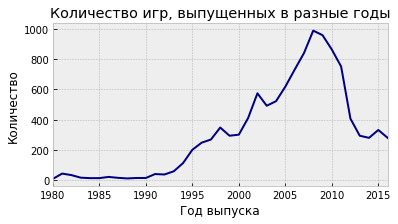

In [31]:
plt.style.use('bmh')

(games_per_year
        .plot(figsize=(6, 3), colormap='jet', legend=False, title='Количество игр, выпущенных в разные годы')
        .set(xlabel='Год выпуска', ylabel='Количество'))

plt.show()

С 2000 года начался подьем игр. Я предполагаю, что это связано с распространением компьютеров и развитием индустрии разработки игр. В 2010 году начинается спад игр, выпущенных на разных платформах. Я думаю, что это связано с тем, что пользователи предпочитают компьютеры, и использовать игры на мобильных телефонах.

## Продажа игр на разных платформах

- Посмотрите, как изменились продажи платформы.
Выберите платформы с наибольшим общим объемом продаж и постройте распределение по годам.
Как долго появляются новые платформы и исчезают старые?

- Возьмите данные за соответствующий текущий период.
Определите текущий период самостоятельно в результате изучения предыдущих вопросов.
Основной фактор - эти данные помогут построить прогноз на 2017 год.

- Не учитывайте данные прошлых лет.

1) Изменения в продажах игр по платформам

In [32]:
def total_platform_sales(df):
    return (
        df
            .pivot_table(index='platform', values='total_sales', aggfunc='sum')
            .sort_values('total_sales', ascending=False)
    )

In [33]:
def bar_plot(df):
    (
        df
            .plot(kind='bar', y='total_sales', figsize=(10, 5), legend=False)
            .set(xlabel='Платформа', ylabel='Глобальные продажи')
    )
plt.show()

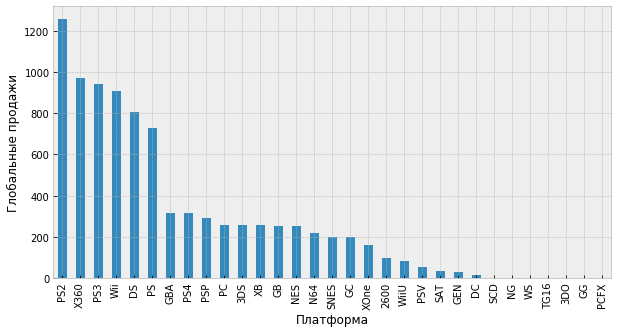

In [34]:
bar_plot(total_platform_sales(data))

Среди лидеров продаж игр - пять платформ PS2, X360, PS3, Wii, DS.

2) Платформы с наибольшим общим объемом продаж
- Выберите платформы с наибольшим общим объемом продаж и постройте распределение по годам.
- За какой характерный период появляются и исчезают новые платформы?
- Линейный график глобальных продаж по платформам по годам.

In [35]:
top5_platform = total_platform_sales(data).head(5)
top5_platform

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


In [36]:
def yearly_total_sales_by_platform(name, df):
    return (
        df
            .query("platform == @name")
            .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
            .sort_values('year_of_release', ascending=False)
    )

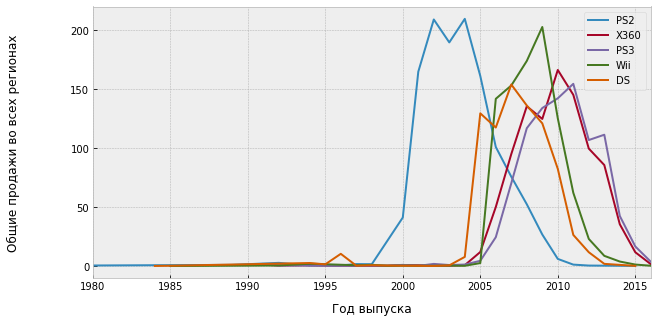

In [37]:
for platform in list(top5_platform.index):
    yearly_total_sales_by_platform(platform, data)['total_sales'].plot(figsize=(10, 5), label=platform)
    plt.xlabel("Год выпуска", labelpad=10)
    plt.ylabel("Общие продажи во всех регионах", labelpad=50)
    plt.legend()

- Общий объем продаж во всех регионах. С 2000 по 2015 год общий объем продаж игр во всех регионах пяти самых популярных платформ растет.
- С 2010 года продажи падают;
- Предположим, текущий период в 10 лет является периодом появления и исчезновения новых платформ.

3) Текущий период для построения прогноза на 2017 год по продажам по платформам.
- Возьмите данные за соответствующий текущий период.
- Определите фактический период самостоятельно в результате изучения предыдущих вопросов.
- Основной фактор - эти данные помогут построить прогноз на 2017 год.
- Не учитывайте данные прошлых лет.

In [38]:
relevant_years = (data['year_of_release'] > 2013) & (data['year_of_release'] <= 2016)
relevant_games = data.loc[relevant_years]
relevant_games.head(15)

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_type,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN,7.55
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.5,M,7.17
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,NaN,7.14


<s><font color='red'>На графике видно, что в 2006м только начался подъем таких платформ, как X360 и PS3. Также видно и то, что эти платформы практически полностью потеряли актуальность в 2016. Скорее всего мы в анализе получим данные по тому, что было успешно в устаревшем поколении платформ. Нам же интересно сделать прогноз на будущее. Пожалуй, стоит посмотреть, в какие годы уже вышли актуальные сегодня платформы, а влияние старых уже манимально и взять за основу анализа именно этот период.

Взял период с 2002 по 2016. По графику пожно понять что актуальность платформы новой примерно 10 лет. на граифке видно россти и падение в такой промежуток лет.

<s><b>UPD: <font color='red'>Я имел в виду, что 2006-й год это слишком рано, данные за этот период уже устарели, вместе с популярными тогда платформами. Нужно взять период посвежее, например 13-16.  
    Видимо, я написал слишком завуалированно ;)

<b><font color='green'>Взял период посвежее, с 13 по 16 года. Видно что актуальность платыформ падает из за переноса на новые платформы более востребованых игр в таких жанрах как Шутер, Спорт.

## Определение потенциально прибыльных платформ

Какие платформы лидируют в продажах, растут или падают?
Выберите несколько потенциально прибыльных платформ.

In [39]:
total_sales = total_platform_sales(relevant_games)

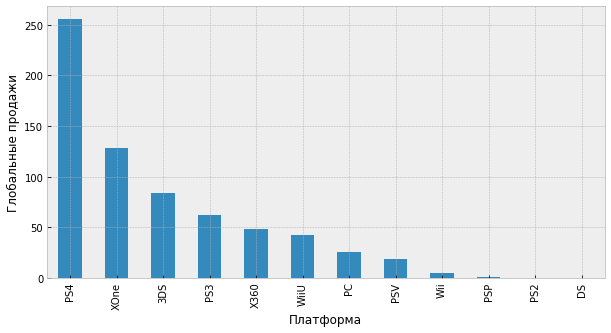

In [40]:
bar_plot(total_sales)

Мы построим графики продаж для каждой платформы на текущий период с 2006 по 2016 год.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 2015.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


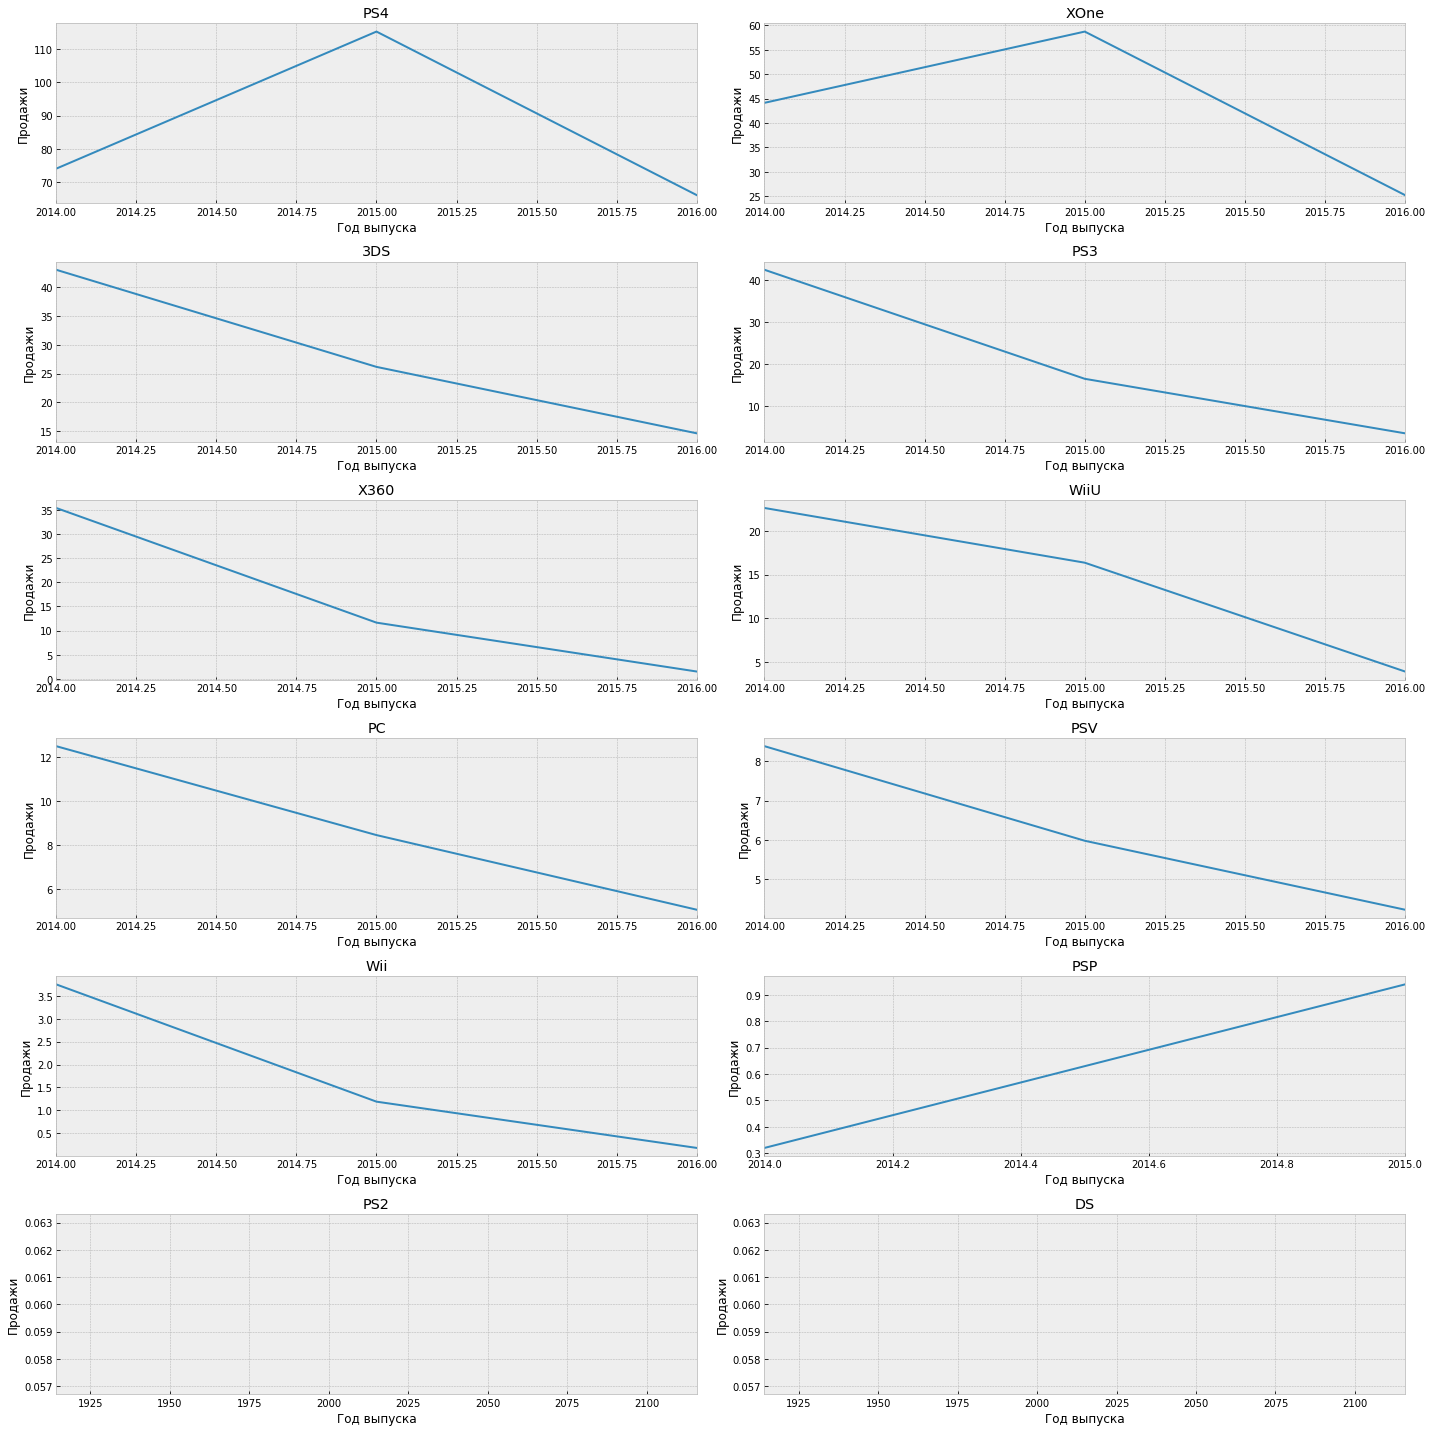

In [41]:
platforms = list(total_sales.index)

rows = 6
cols = (len(platforms) // rows)
fig, ax = plt.subplots(rows, cols)

num = 0
for row in range(rows):
    for col in range(cols):
        platform = platforms[num]
        (
            yearly_total_sales_by_platform(platform, relevant_games)['total_sales']
                .plot(ax=ax[row, col], figsize=(20, 20), title=platform)
                .set(xlabel='Год выпуска', ylabel='Продажи')
        )
        num += 1

plt.tight_layout()
plt.show()

Все графики показывают, что в период с 2006 по 2016 год продажи всех платформ падают.
Из пяти платформ лидеров по продажам PS2, X360, PS3, Wii, DS - почти все они упали в продажах.
Но появились многообещающие платформы, среди которых: PS4, XOne, 3DS, PSV, DC.

## Графики продаж игр на разных платформах

Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.

Графики продаж для наиболее перспективных платформ PS4, XOne.

(0, 0.6)

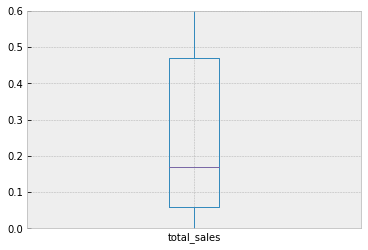

In [42]:
data.boxplot(column='total_sales')
plt.ylim(0, 0.6)

Основная масса игр имела от 60 до 470 тысяч игроков с медианой 170 тысяч

СЛУЧАЙНО УДАЛИЛ КОМЕНТАРИЙ НАСТАВНИКА!!!!

## Влияние обзоров продаж на платформе

- Посмотрите, как отзывы пользователей и критика влияют на продажи в рамках одной популярной платформы.
Постройте точечную диаграмму и рассчитайте соотношение между обзорами и продажами. Сформулируйте свои выводы.

- Соотнесите полученные данные с продажами игр на других платформах.

Я посмотрю, как они влияют на продажи на платформе PS4.

In [43]:
ps4 = relevant_games.query("platform == 'PS4'")

In [44]:
features = ['user_score', 'critic_score', 'total_sales']
ps4[features].corr()

,user_score,critic_score,total_sales
user_score,1.00000,0.543850,-0.081460
critic_score,0.54385,1.000000,0.393285
total_sales,-0.08146,0.393285,1.000000


Я построю точечную диаграмму и вычислю соотношение между обзорами и продажами платформы PS4.

- Точная диаграмма между обзорами игроков и продажами платформы PS4.

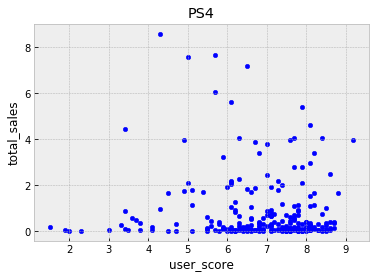

In [45]:
ps4.plot(x='user_score', y='total_sales', kind='scatter', title='PS4')
plt.show()

- Точная диаграмма между обзорами критиков и продажами платформы PS4.

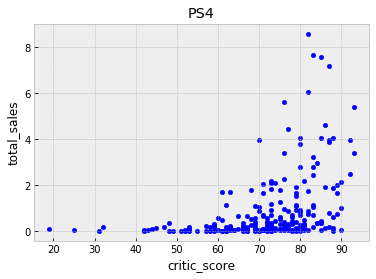

In [46]:
ps4.plot(x='critic_score', y='total_sales', kind='scatter', title='PS4')
plt.show()

Из диаграмм рассеяния можно сделать следующие выводы:

- Нет никакой связи между отзывами пользователей и продажами игр, так как график показывает, что есть много положительных отзывов, и там, где количество продаж игр невелико, это означает, что люди могут смотреть продажи игры;
- Существует связь между отзывами критиков и продажами, но не сильно;

Корреляция не означает причинно-следственную связь. Хотя мы можем видеть из диаграмм разброса, что чем выше рейтинг критиков, тем выше продажи игр на обеих платформах, мы не можем сказать, что высокие оценки критиков приводят к высоким продажам игр, и при покупке игры пользователи доверяют критикам больше, чем совет друзей.

<font color='brown'>Еще можно исследовать прочие платформы, может быть, на каких-то из них влиения пользователей более выражено?

## Влияние игровых жанров на продажи

Посмотрите на общее распределение игр по жанрам. Как насчет самых прибыльных жанров? Выделяются ли жанры с высокими и низкими продажами?

In [47]:
def total_genre_sales(df):
    return (
        df
            .pivot_table(index='genre', values='total_sales', aggfunc='sum')
            .sort_values('total_sales', ascending=False)
    )

In [48]:
def bar_plot_genre(df):
    (
        df
            .plot(kind='bar', y='total_sales', figsize=(10, 5), legend=False)
            .set(xlabel='Жанр', ylabel='Глобальные продажи')
    )
plt.show()

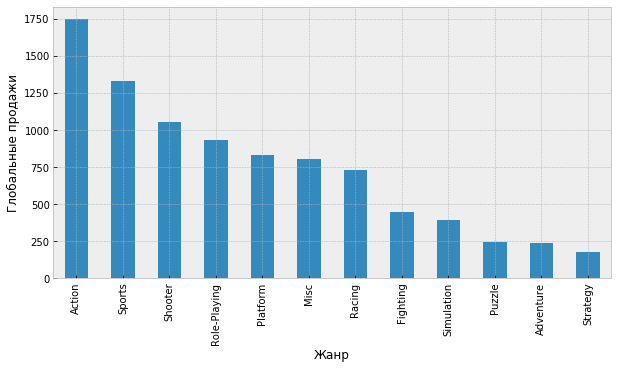

In [49]:
bar_plot_genre(total_genre_sales(data))

Самые популярные жанры продаж в мире - Экшн-игры, Спортивные игры и Стрелялки.
Стратегические игры и квесты наименее популярны, скорее всего, прохождение таких игр требует больше времени, а такие игры не требуют участия команды.

<font color='blue'>А еще можно взглянуть на средний чек по жанрам. Возможно стратегий просто мало производят, поэтому и суммарные продажи небольшие.

In [50]:
data.head()

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_type,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


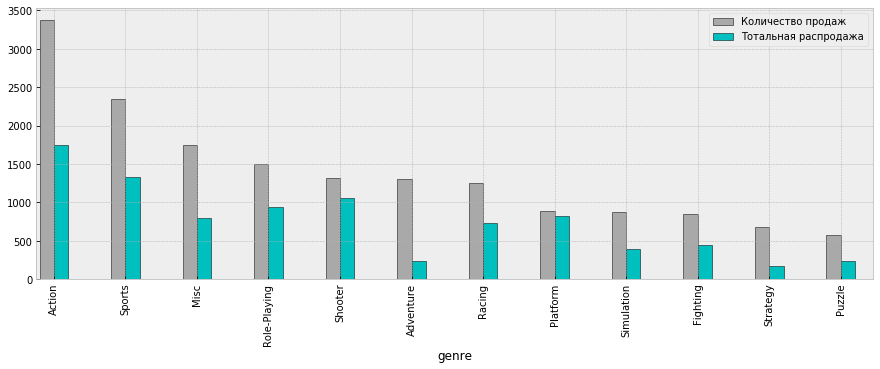

In [51]:
ax = plt.gca()

pivot = data.groupby('genre').agg({'game_name': 'count', 'total_sales': 'sum'}).sort_values(by='game_name', ascending=False)

plot1 = pivot['game_name']
plot1.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, color='darkgrey', position=1)

plot2 = pivot['total_sales']
plot2.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, color='c', position=0)

ax.legend(['Количество продаж', 'Тотальная распродажа'])

# Шаг 4. Пользовательский портрет каждого региона

Определение для пользователя каждого региона (NA, EU, JP)

## Самые популярные платформы (Топ 5)

Самые популярные платформы (топ 5). Опишите различия в продажах акций.

In [52]:
def top_in_regions_plot(groupby, region_sales, ax):
    pivot = data.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'North America Sales', 'eu_sales': 'Europe Sales', 'jp_sales': 'Japan Sales'}
    color_dict = {'na_sales': 'darkgrey', 'eu_sales': 'tomato', 'jp_sales': 'c'}
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], 
                   fontsize=18, color=color_dict[region_sales], rot=20)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)

<font color='blue'>В продажах акций?

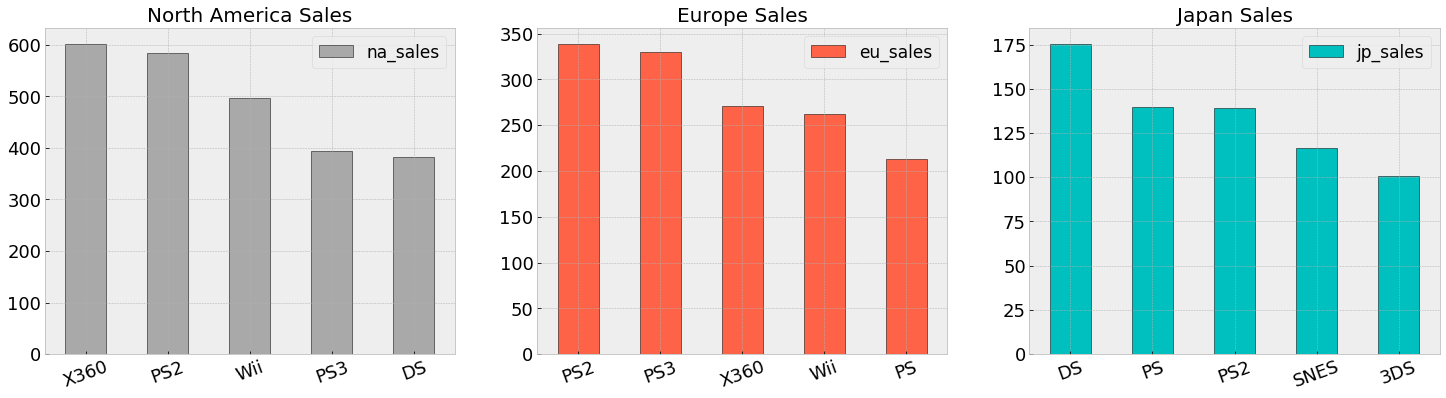

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('platform', 'na_sales', 0)
top_in_regions_plot('platform', 'eu_sales', 1)
top_in_regions_plot('platform', 'jp_sales', 2)

В Америке самая популярная платформа для игр XBox - это 32% и 24% платформа Wii.
В Европе самую популярную PS3 предпочитали 30% пользователей. На втором месте - платформа X360 - у нее 25% поклонников.
Самый популярный в Японии самый популярный. DC предпочитали 25% пользователей, а платформу 3DC не оставили без внимания 24% поклонников.

## Самые популярные жанры (Топ 5)

Самые популярные жанры (топ 5). Объясните разницу.

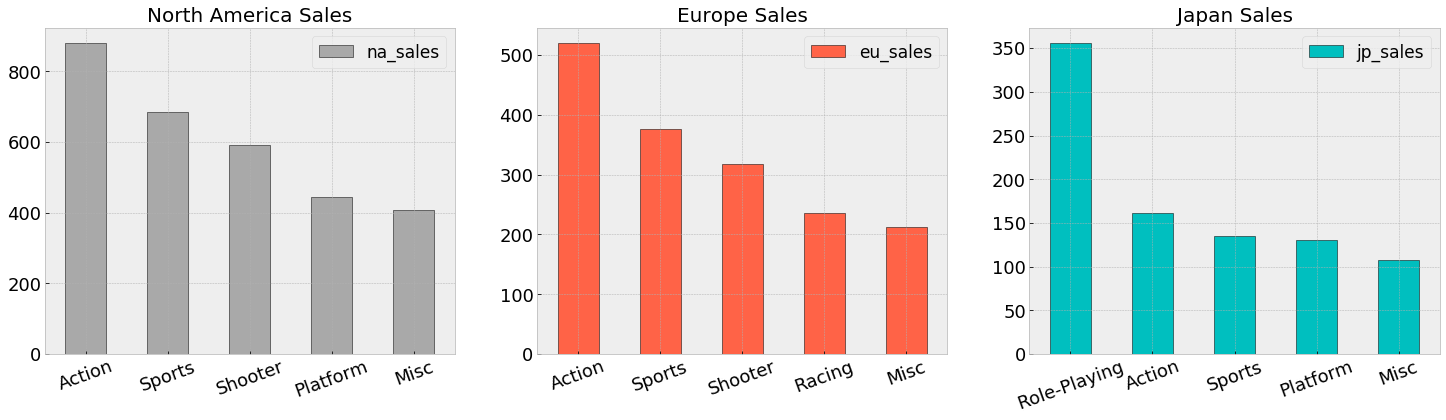

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('genre', 'na_sales', 0)
top_in_regions_plot('genre', 'eu_sales', 1)
top_in_regions_plot('genre', 'jp_sales', 2)

В Америке, наиболее популярном жанре экшн-игр, его предпочли 31% пользователей, а на втором месте шутеры - 22%.
В Европе жанр экшн-игр также наиболее популярен, 34% предпочитают его, а Стрелки идут вторыми с 23%.
В Японии наиболее популярный жанр ролевых игр отдали предпочтение 41% пользователей, а на втором месте - Action - 26%.

<font color='green'>Очень хорошо, все супер наглядно.

## Влияет ли рейтинг ESRB на продажи в конкретном регионе?

Влияет ли рейтинг ESRB на продажи в конкретном регионе?

In [55]:
rating = pd.read_csv('/datasets/rating.csv')
rating.tail()

,rating_type,decryption
3,E10+,Для всех старше 10 лет
4,K-A,Для всех(до 1998 года)
5,AO,Только для взрослых
6,EC,Для детей младшего возраста
7,RP,Рейтинг ожидается


In [56]:
ESRB_dict = {'E': 'Для всех', 'M': '> 17 лет', 'T': '13-19 лет', 'E10+': '>10 лет', 'K-A': 'Для всех(устар.)'}

In [57]:
data['ESRB_description'] = data[data['rating_type'].notnull()]['rating_type'].map(ESRB_dict)

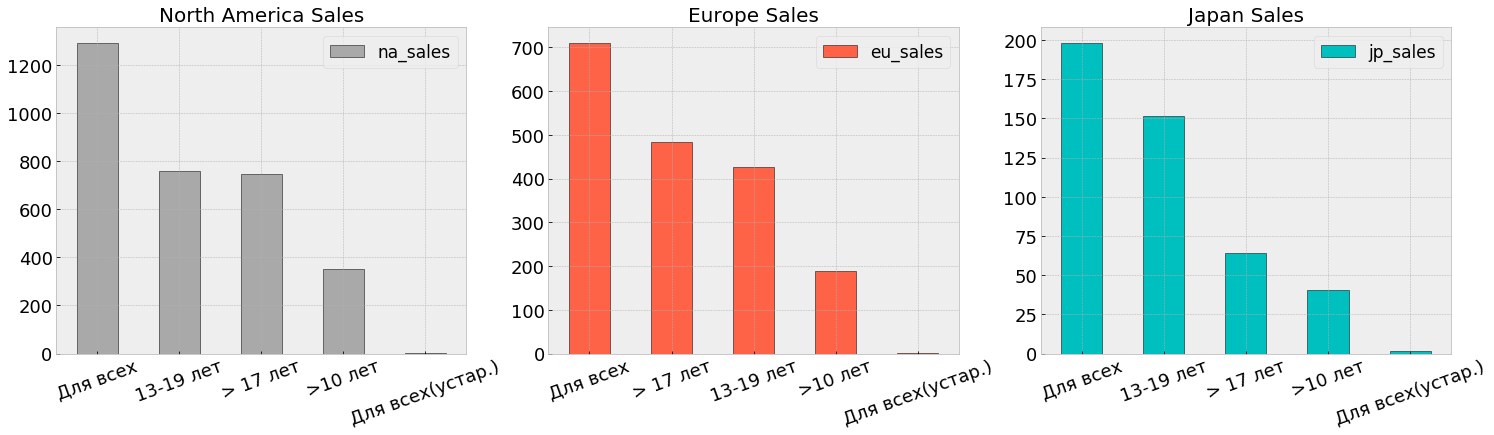

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('ESRB_description', 'na_sales', 0)
top_in_regions_plot('ESRB_description', 'eu_sales', 1)
top_in_regions_plot('ESRB_description', 'jp_sales', 2)

В Америке 35% всех продаж игр приходится на игры для детей и 29% на игры для взрослых (17+).
В Европе 34% всех продаж игр приходится на игры для детей и 33% игр для взрослых (17+).
В Японии 39% всех продаж игр приходится на игры для детей и 31% продаж игр для взрослых (17+).

# Шаг 5. Проверка гипотез

## Гипотеза 1: Средний рейтинг пользователей для платформ Xbox One и PC одинаков

Задания:
- Установите пороговое значение альфа самостоятельно.
- Объясните: как вы сформулировали нулевую и альтернативную гипотезы;
- Объясните: какие критерии использовались для проверки гипотез и почему.

Предполагаемая возможность отклонения среднего пользовательского рейтинга от ожидаемого в обоих направлениях, то есть гипотеза двусторонняя. Необходимо учитывать две группы населения:

- Средние пользовательские рейтинги платформ Xbox One за текущий период для составления прогнозов на 2017 год по продажам на платформе;
- Средние пользовательские рейтинги платформ ПК за текущий период для составления прогнозов на 2017 год по продажам на платформе.

Текущий период для составления прогнозов на 2017 год по продажам по платформам был взят с 2006 по 2016 год.
Он использует t-критерий Стьюдента, потому что два сравниваемых образца не зависят друг от друга.
Пороговое значение альфа (критический уровень статистической значимости) установлено на 2%. У меня много пропусков, у меня точно есть данные, если я установлю уровень значимости на уровне 5%.

Гипотеза:

- Нулевая гипотеза H₀: средние оценки пользователей для платформ Xbox One и ПК одинаковы.
- Альтернативная гипотеза H₁: средние оценки пользователей для платформ Xbox One и ПК отличаются.

In [71]:
alpha = 0.05

pc = relevant_games.query("platform == 'PC'")
xone = relevant_games.query("platform == 'XOne'")

results = st.ttest_ind(
    xone['user_score'],
    pc['user_score'],
    equal_var=False,  # T-критерий Уэлча, который не подразумевает равенство дисперсий
    nan_policy='omit' # игнорировать упущения
)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отклонить нулевую гипотезу")
else:
    print("Не удалось отклонить нулевую гипотезу")

p-value: 0.13087616880173122
Не удалось отклонить нулевую гипотезу


In [72]:
pc['user_score'].mean()

6.28595041322314

In [73]:
xone['user_score'].mean()

6.573125

<font color='green'> H₀ Нулевая гипотеза: средние пользовательские рейтинги для платформ Xbox One и ПК одинаковы - подтверждено.

<b>UPD: <font color='blue'>Действительно, вероятность, того, что средние оценки на самом деле равны довольно высока - 13%. На этом основании мв не можем наверняка утверждать, что оценки различаются.

<s><b>UPD: <font color='red'>Пожалуйста, перепиши вывод по обеим гипотезам в соответствии с новыми результатами. 

## Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports разные

Задания:
- Установите пороговое значение альфа самостоятельно.
- Объясните: как вы сформулировали нулевую и альтернативную гипотезы;
- Объясните: какие критерии использовались для проверки гипотез и почему.
- Необходимо рассмотреть два основных агрегата: 1) игры жанра Action и 2) игры жанра Sports.
- Я также взял текущий период для построения прогноза продаж на 2017 год по платформам с 2006 по 2016 год.
- Я использую t-критерий Стьюдента, потому что два сравниваемых образца не зависят друг от друга.
- Пороговое значение альфа (критический уровень статистической значимости) установит стандартное значение на 5%. Так как в данных, которые я имею по жанрам, было обнаружено только 2 прохода.

Гипотезы:
- H₀ Нулевая гипотеза: средние оценки пользователей для жанров Action и Sports одинаковы.
- Альтернативная гипотеза H₁: средние оценки пользователей жанров Action и Sports различаются.

In [74]:
alpha = 0.05
action = relevant_games.query("genre == 'Action'")
sports = relevant_games.query("genre == 'Sports'")

results = st.ttest_ind(
    action['user_score'],
    sports['user_score'],
    nan_policy='omit' # игнорируем пропуски
)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отклонить нулевую гипотезу")
else:
    print("Не удалось отклонить нулевую гипотезу")

p-value: 2.7812828600813157e-18
Отклонить нулевую гипотезу


In [75]:
action['user_score'].mean()

6.740492957746479

In [76]:
sports['user_score'].mean()

5.225196850393701

<font color='green'> Средние пользовательские рейтинги для жанров «Экшн» и «Спорт» различны, а уровень значимости 2,78 указывает на то, что не получится получить такую разницу в значениях.
    Альтернативная гипотеза H₁: средние оценки пользователей жанров Action и Sports разные - подтверждено

<b>UPD: <font color='blue'>Вероятность, что средние оценки действительно одинаковы крайне мала - 0.000000000000000278%. Таким образом, мы отвергаем гипотезу об их равенстве и принимаем альтернативную - оценки различаются.

# Шаг 6. Общий вывод

На основании анализа поведения покупателей интернет-магазина Strimchik, покупателей игр, можно сделать следующие выводы:
- С 2000 года началась загрузка игр. Я предполагаю, что это связано с распространением компьютеров и развитием индустрии разработки игр. В 2010 году начинается спад игр, выпущенных на разных платформах. Я думаю, что это связано с тем, что пользователи предпочитают компьютеры использовать игры на мобильных телефонах. Среди лидеров продаж игр за все время находятся пять платформ PS2, X360, PS3, Wii, DS.
- На всех графиках видно, что за период с 2006 по 2016 год продажи всех платформ падают. Из пяти платформ лидеров по продажам PS2, X360, PS3, Wii, DS - почти все они упали в продажах. Но есть новые перспективные платформы, среди которых: PS4, XOne, 3DS, PSV, DC.
- Из диаграмм разброса я обнаружил, что нет никакой связи между отзывами пользователей и продажами игр, так как график показывает, что есть много положительных отзывов и, где количество продаж игр невелико, это означает, что люди могут смотреть потоки в игре. Существует связь между отзывами критиков и продажами, но не так много. Корреляция не означает причинно-следственную связь. Хотя из диаграмм разброса видно, что чем выше рейтинг критиков, тем выше продажи игр на обеих платформах, мы не можем сказать, что высокие оценки критиков приводят к высоким продажам игр, и при покупке игры пользователи доверяют критикам больше, чем совет друзей.
- Самые популярные жанры продаж в мире - Экшн-игры, спортивные игры и Стрелялки. Стратегические игры и квесты наименее популярны, скорее всего, прохождение таких игр требует больше времени, а такие игры не требуют участия команды.

Самые популярные игровые платформы по регионам:
- В Америке самая популярная платформа для игр XBox - это 32% и 24% платформа Wii.
- В Европе самую популярную PS3 предпочитали 30% пользователей. На втором месте - платформа X360 - у нее 25% поклонников.
- Самый популярный в Японии самый популярный. DC предпочитали 25% пользователей, а платформу 3DC не оставили без внимания 24% поклонников.

Самые популярные жанры игр по регионам:
- В Америке, наиболее популярном жанре экшн-игр, его отдали предпочтение 31% пользователей, а Стрелялки на втором месте - 22%.
- В Европе жанр экшн-игр также наиболее популярен; 34% пользователей предпочли его, а Стрелки заняли второе место, 23%.
- В Японии наиболее популярный жанр ролевых игр отдали предпочтение 41% пользователей, а на втором месте - Action - 26%.

Рейтинг игрового контента по регионам:
- В Америке 35% всех продаж игр приходится на игры для детей и 29% игр для взрослых (17+).
- В Европе 34% всех продаж игр приходится на игры для детской аудитории и 33% продаж на игры для взрослой аудитории (17+).
- В Японии 39% всех продаж игр приходится на игры для детской аудитории и 31% продаж на игры для взрослой аудитории (17+).

Предположение о том, что средние пользовательские рейтинги платформ Xbox One и ПК совпадают, подтверждается.
Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports различаются, подтверждается.

Рекомендации интернет-магазину Strimchik:
- Для более надежного анализа данных необходимо указать источники обратной связи от критиков и пользователей и заполнить набор данных без пропусков.

<font color='green'>Хороший подробный вывод по всем пунктам но после изменения период что-то может измениться, не забудь пересмотреть.

<font color='blue'>Итак, у тебя отличный сборный проект. Ты показываешь хорошее владение всем изучаемым в модуле материалом. Уверенно пользуешься pandas, умеешь очищать и обогощать данные, строишь отличные наглядные графики. Делаешь четкие обоснованные выводы. К оформлению работы также претензий нет.
    Из серьезных замечений у меня только актуальный период. Разберись с ним, ну и еще по мелочи. Удачи!

<b>UPD: <font color='blue'>Еще один рывок и мы у цели - взять период посвежее и перепроверить выводы по гипотезам.

#### !Исправил после коментария наставника.

<b>UPD: <font color='blue'>Хорошо, работу я принимаю. Но рекомендую еще раз почитать про проверку гипотез и почитать мои формулировки.  
    Успехов в следующем модуле!